In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LECTURA DATOS DE JURADOS

In [116]:
data_jurors = pd.read_csv("jurors.csv")
data_jurors.head(2)

,id,trial,trial__id,race,gender,race_source,gender_source,struck_by,strike_eligibility
0,35,1993-9826--Terry L. Landingham,1,White,Male,Jury strike sheet,Jury strike sheet,Struck for cause,NaN
1,38,1993-9826--Terry L. Landingham,1,Black,Female,Jury strike sheet,Jury strike sheet,Struck for cause,NaN


In [117]:
data_jurors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14874 entries, 0 to 14873
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  14874 non-null  int64 
 1   trial               14874 non-null  object
 2   trial__id           14874 non-null  int64 
 3   race                14874 non-null  object
 4   gender              14874 non-null  object
 5   race_source         14874 non-null  object
 6   gender_source       14874 non-null  object
 7   struck_by           14874 non-null  object
 8   strike_eligibility  8111 non-null   object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [118]:
#Creación columna año
data_jurors['year'] = data_jurors.trial.str[:4]
data_jurors.year = data_jurors.year.astype('int')

In [119]:
#Eliminación columnas redundantes o de fuentes de datos
data_jurors.drop(columns=['trial','race_source','gender_source'], inplace=True)

In [120]:
data_jurors['race'].value_counts()

White      6241
Unknown    4752
Black      3877
Asian         3
Latino        1
Name: race, dtype: int64

In [121]:
#Selección de las categorías 'Black' y 'White' la columna 'race'
mask_jurors_2 = ['Black', 'White']
data_jurors_mask_2 = data_jurors['race']. apply(lambda x: x in mask_jurors_2)
data_jurors_3 = data_jurors.loc[data_jurors_mask_2]
data_jurors = data_jurors_3

In [122]:
data_jurors.pivot_table(index = 'race', columns = 'gender', aggfunc = {'id' : 'count'})

id              
gender Female  Male Unknown
race                       
Black    2221  1381     275
White    3217  2650     374

In [123]:
#Creación de variables dummies para la tabla de jurados
col_dummies = ['race', 'gender']
dummy_df = pd.get_dummies(data_jurors[col_dummies], drop_first=True)
data_jurors = pd.concat([data_jurors.drop(col_dummies, axis=1), dummy_df], axis=1)

In [124]:
#cantidad de jurados
print(f'Cantidad de jurados: {len(data_jurors.id.unique())}')

Cantidad de jurados: 10118


In [125]:
#cantidad de juicios
print(f'Cantidad de juicios: {len(data_jurors.trial__id.unique())}')

Cantidad de juicios: 226


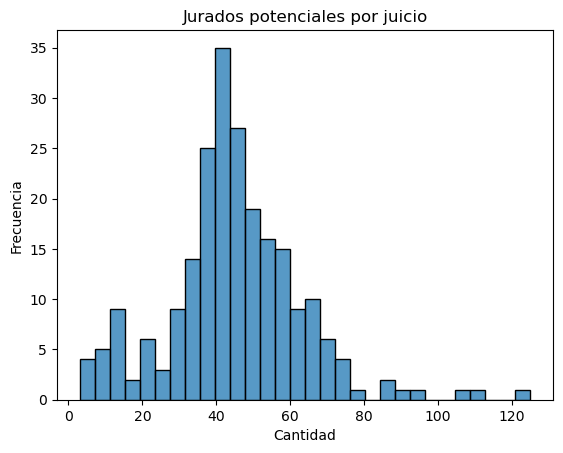

In [126]:
# cantidad de potenciales jurados evaluados por juicio

juror_x_trial = data_jurors.groupby('trial__id').agg(
    count_juror=pd.NamedAgg(column="id", aggfunc="count")
)

# juror_x_trial['count_juror'].hist(bins=30) #--> graficar serie directamente
sns.histplot(data=juror_x_trial, x='count_juror', bins=30)

plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Jurados potenciales por juicio')
plt.show()

In [127]:
juror_x_trial.sort_values(by='count_juror').describe()

,count_juror
count,226.000000
mean,44.769912
std,18.286368
min,3.000000
25%,36.000000
50%,44.000000
75%,53.000000
max,125.000000


-Promedio de jurados por juicio: 48

-Mínimo de jurados en un juicios : 19

-Máximo de jurados en un juicios : 130


Both State and Defense    3503
State                     1626
Defense                    155
Neither                    136
Name: strike_eligibility, dtype: int64
Valores nulos  4698
Total de datos  10118


<AxesSubplot:xlabel='strike_eligibility', ylabel='count'>

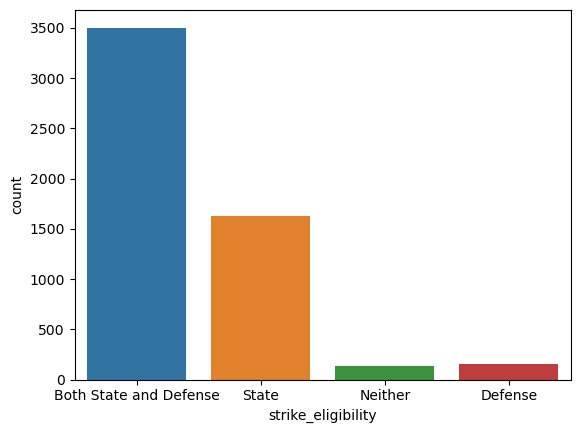

In [128]:
print(data_jurors.strike_eligibility.value_counts())
print(f'Valores nulos ' , data_jurors.strike_eligibility.isna().sum())
print(f'Total de datos ', data_jurors.strike_eligibility.shape[0])

sns.countplot(x='strike_eligibility', data=data_jurors)

In [129]:
data_jurors_struck_by=pd.DataFrame(data_jurors.struck_by)

In [130]:
#Agrupamos los valores de la variable target (elegido o rechazado)

etiquetas_struck_by = { 
             'Juror chosen to serve on jury': 'Elegido',
             'Juror not struck':  'No rechazado',
             'Struck by the defense':  'Por la defensa',
             'Struck for cause':  'Por causa',
             'Struck by the state':  'Por el estado',
             'Struck without notation': 'Rechzada sin notación',
             'Juror excused/absent': 'Exhimido/Ausente',
             'Juror chosen as alternate': 'Suplente',
             'Unknown': 'Desconocido'
             }


data_jurors_struck_by['struck_by'] = data_jurors_struck_by['struck_by'].map(etiquetas_struck_by)

Valores nulos  0
Total de datos  10118
No rechazado             2900
Elegido                  2462
Por la defensa           1466
Por causa                1342
Por el estado            1285
Rechzada sin notación     362
Suplente                  240
Exhimido/Ausente           43
Desconocido                18
Name: struck_by, dtype: int64


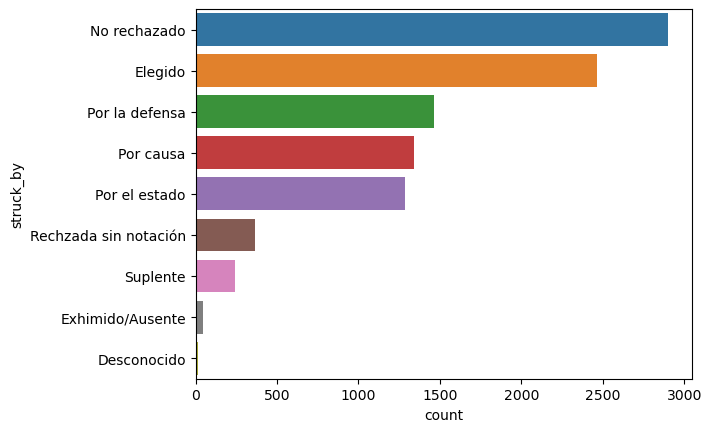

In [131]:
print(f'Valores nulos ' , data_jurors_struck_by.struck_by.isna().sum())
print(f'Total de datos ', data_jurors_struck_by.struck_by.shape[0])

#Analizamos la correlación que existe entre algunas de las variables
orden=data_jurors_struck_by.struck_by.value_counts().index
sns.countplot(y='struck_by', data=data_jurors_struck_by, order=orden)

print(data_jurors_struck_by.struck_by.value_counts())

In [132]:
data_jurors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10118 entries, 0 to 14873
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10118 non-null  int64 
 1   trial__id           10118 non-null  int64 
 2   struck_by           10118 non-null  object
 3   strike_eligibility  5420 non-null   object
 4   year                10118 non-null  int32 
 5   race_White          10118 non-null  uint8 
 6   gender_Male         10118 non-null  uint8 
 7   gender_Unknown      10118 non-null  uint8 
dtypes: int32(1), int64(2), object(2), uint8(3)
memory usage: 784.4+ KB


------------------------

LECTURA DATOS DE JUICIOS

In [133]:
data_trials = pd.read_csv("trials.csv")
data_trials.head(5)

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_code_5,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present
0,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
1,2,Donovan Johnson,2009-0023,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
2,3,Sparky Watson,2004-0257,True,True,Grenada,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
3,4,Phillip Knickel,1998-0020,False,True,Montgomery,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
4,5,Donald Dotson,1994-9918,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True


In [134]:
data_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           305 non-null    int64  
 1   defendant_name               305 non-null    object 
 2   cause_number                 305 non-null    object 
 3   state_strikes                305 non-null    bool   
 4   defense_strikes              305 non-null    bool   
 5   county                       305 non-null    object 
 6   defendant_race               305 non-null    object 
 7   second_defendant_race        15 non-null     object 
 8   third_defendant_race         2 non-null      object 
 9   fourth_defendant_race        0 non-null      float64
 10  more_than_four_defendants    305 non-null    bool   
 11  judge                        305 non-null    object 
 12  prosecutor_1                 303 non-null    object 
 13  prosecutor_2        

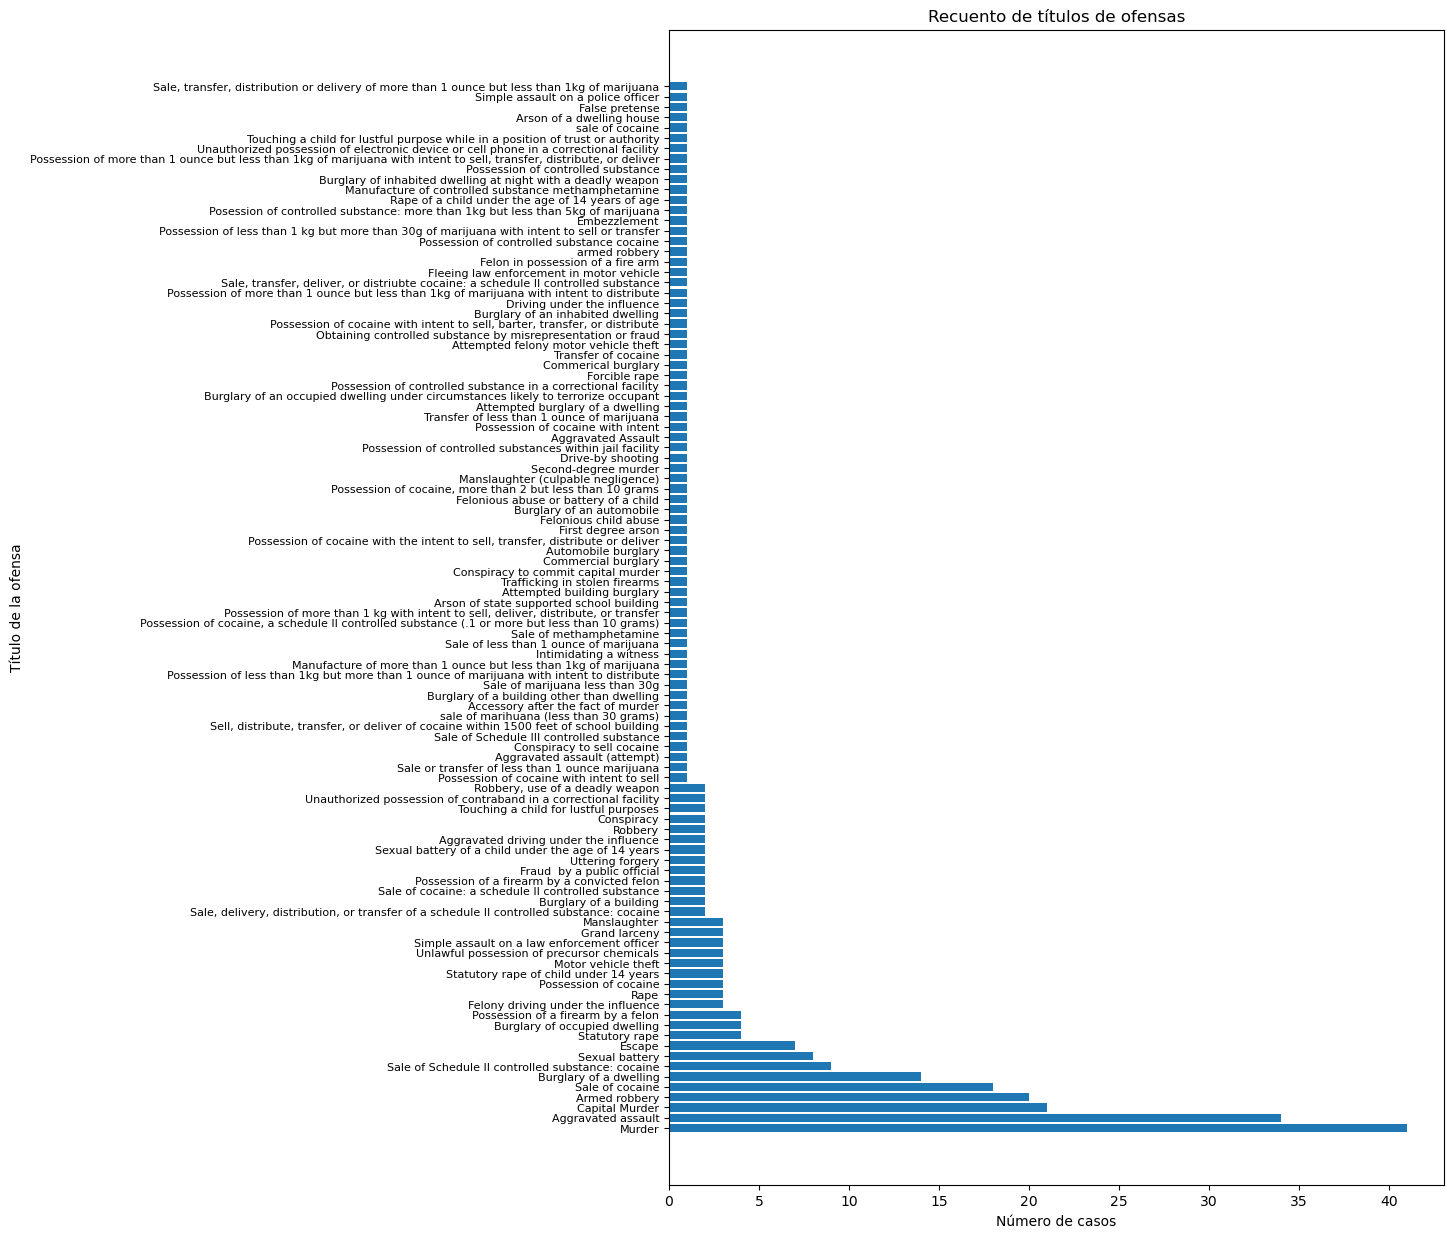

In [135]:
import matplotlib.pyplot as plt

# Calcular el conteo de cada valor único en la columna 'offense_title_1'
value_counts = data_trials.offense_title_1.value_counts()

# Crear una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 15))

# Crear un gráfico de barras horizontal dentro de la figura
plt.barh(value_counts.index, value_counts.values)

# Ajustar el tamaño de la fuente de las etiquetas en el eje y a 8 puntos
plt.tick_params(axis='y', labelsize=8)

# Añadir títulos y etiquetas de los ejes
plt.title('Recuento de títulos de ofensas')
plt.xlabel('Número de casos')
plt.ylabel('Título de la ofensa')

# Mostrar el gráfico
plt.show()


In [136]:
from collections import Counter

In [137]:
all_words = []
for row in data_trials['offense_title_1']:
    words = row.lower().split()
    all_words.extend(words)

In [138]:
stopwords = ['manslaughter', 'murder','assault','possession','burglary','dwelling','robbery','substance','rape','marijuana','cocaine','battery', 'theft'] 
filtered_words = [word for word in all_words if word in stopwords]
word_counts = Counter(filtered_words)

In [139]:
word_counts_list = list(word_counts.items())
word_counts_list.sort(key=lambda x: x[1], reverse=True)

print("Cantidad de palabras encontradas:", len(word_counts_list))
print("Palabras más utilizadas:")

words = []

for word, count in word_counts_list:
    words.append(word)
    print(f"{word}: {count}")

Cantidad de palabras encontradas: 13
Palabras más utilizadas:
murder: 65
cocaine: 41
assault: 40
possession: 31
burglary: 30
dwelling: 24
robbery: 23
rape: 12
battery: 11
marijuana: 11
substance: 10
manslaughter: 4
theft: 4


In [140]:
print(words)

['murder', 'cocaine', 'assault', 'possession', 'burglary', 'dwelling', 'robbery', 'rape', 'battery', 'marijuana', 'substance', 'manslaughter', 'theft']


In [141]:
# Filtra las filas del DataFrame que contienen al menos una palabra de la lista "words"
filtered_data = data_trials[data_trials['offense_title_1'].str.lower().str.contains('|'.join(words))]

# Crea una nueva columna "ofensa" que contiene la palabra encontrada en la columna "data_trials.offense_title_1"
filtered_data['ofensa'] = filtered_data['offense_title_1'].apply(lambda x: [word for word in words if word in x.lower()][0])

# filtered_data[['offense_title_1','ofensa']].sample(10)


C:\Users\alejo\AppData\Local\Temp\ipykernel_1956\3107046408.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
#Creación columna de agrupamiento de delitos en dataframe de juicios
data_trials['offense'] = filtered_data.loc[:,'ofensa']
data_trials.sample(5)

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present,offense
144,145,James Booker,1995-7171,True,True,Montgomery,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Aquitted on all counts,False,False,False,False,burglary
73,74,Benjamin Redwine,1994-6777,False,True,Grenada,White,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,False,robbery
259,261,Kenyoung Fair,2007-0024,False,False,Choctaw,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,murder
197,199,Melvin Woolie,1993-9818,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,NaN
240,242,Marvin Fields,2000-0288,True,True,Grenada,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,burglary


In [143]:
data_trials['offense'].fillna('other', inplace=True)

In [144]:
#Hacemos un agrupamiento final por tipo de crimen
etiquetas_ofensas = {
    'murder': 'Homicide-related',
    'manslaughter': 'Homicide-related',
    'assault': 'Assault-related',
    'possession': 'Drug-related',
    'cocaine': 'Drug-related',
    'marijuana': 'Drug-related',
    'substance': 'Drug-related',
    'robbery': 'Robbery-related',
    'dwelling': 'Robbery-related',
    'theft': 'Robbery-related',
    'burglary': 'Robbery-related',
    'rape': 'Sexual-related',
    'battery': 'Sexual-related',
    'other': 'Miscellaneous'
}
data_trials['offense'] = data_trials['offense'].map(etiquetas_ofensas)


In [145]:
data_trials.head()

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present,offense
0,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Assault-related
1,2,Donovan Johnson,2009-0023,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Drug-related
2,3,Sparky Watson,2004-0257,True,True,Grenada,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Miscellaneous
3,4,Phillip Knickel,1998-0020,False,True,Montgomery,White,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Robbery-related
4,5,Donald Dotson,1994-9918,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True,Assault-related


In [146]:
data_trials.drop(['offense_code_1','offense_title_1'], axis=1,inplace= True)

In [147]:
data_trials['offense'] = data_trials['offense'].astype(str)

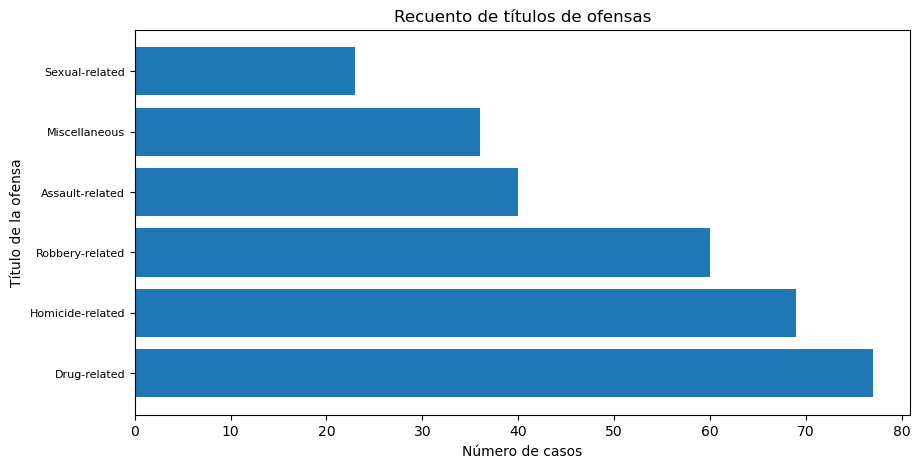

In [148]:
import matplotlib.pyplot as plt

# Calcular el conteo de cada valor único en la columna 'offense_title_1'
value_counts = data_trials.offense.value_counts()

# Crear una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 5))

# Crear un gráfico de barras horizontal dentro de la figura
plt.barh(value_counts.index, value_counts.values)

# Ajustar el tamaño de la fuente de las etiquetas en el eje y a 8 puntos
plt.tick_params(axis='y', labelsize=8)

# Añadir títulos y etiquetas de los ejes
plt.title('Recuento de títulos de ofensas')
plt.xlabel('Número de casos')
plt.ylabel('Título de la ofensa')

# Mostrar el gráfico
plt.show()


In [149]:
data_trials['offense'].value_counts()

Drug-related        77
Homicide-related    69
Robbery-related     60
Assault-related     40
Miscellaneous       36
Sexual-related      23
Name: offense, dtype: int64

In [150]:
import plotly.express as px

fig = px.histogram(data_trials, x="defendant_race", title="Distribución de la raza de los acusados",color='defendant_race')
fig.show()

In [151]:
#Selección de las categorías 'Black' y 'White' la columna 'race' para los juicios
mask_trials = ['Black', 'White']
data_trials_mask = data_trials['defendant_race']. apply(lambda x: x in mask_trials)
data_trials_2 = data_trials.loc[data_trials_mask]
data_trials = data_trials_2

In [152]:
#Eliminación columnas irrelevantes o con pocos datos
data_trials.drop(columns=['offense_code_2','offense_title_2','offense_code_3','offense_title_3','defendant_name','cause_number','second_defendant_race','third_defendant_race','fourth_defendant_race','prosecutor_1','prosecutor_2','prosecutor_3','def_attny_1','def_attny_2','def_attny_3','offense_code_4','offense_code_5','offense_code_6','offense_title_4','offense_title_5','offense_title_6','prosecutors_more_than_three','def_attnys_more_than_three','more_than_six','verdict','case_appealed','voir_dire_present','more_than_four_defendants'],inplace=True)

In [153]:
#Conservamos 10 columnas de las 38 iniciales
data_trials.shape

(292, 9)

In [154]:
import plotly.express as px

fig = px.histogram(data_trials, x="defendant_race",labels=None,title="Distribución de la raza de los acusados",color='defendant_race')
fig.show()
#color_discrete_sequence=['#1f77b4']

In [155]:
#Distribución de los datos por condado
data_trials.county.value_counts()

Grenada       75
Attala        69
Montgomery    47
Winston       41
Choctaw       32
Carroll       16
Webster       12
Name: county, dtype: int64

In [156]:
data_trials['judge'].value_counts()

Joseph Loper, Jr    155
C. Morgan, III      117
Other                16
George Mitchell       3
C. Morgan, Jr         1
Name: judge, dtype: int64

In [157]:
#Agrupamos los distintos jueces según cantidad de observaciones
etiquetas = {
    'Joseph Loper, Jr' :   'Joseph Loper, Jr',
    'C. Morgan, III'    :  'C. Morgan, III',
    'Other'              :  'Other',
    'George Mitchell'     :  'Other',
    'C. Morgan, Jr'        : 'Other'
}


data_trials['judge'] = data_trials['judge'].map(etiquetas)

In [158]:
#Transformación de columnas booleanas a enteras
data_trials['state_strikes'] = data_trials.state_strikes.astype('int')
data_trials['defense_strikes'] = data_trials.defense_strikes.astype('int')
data_trials['batson_claim_by_state'] = data_trials.batson_claim_by_state.astype('int')
data_trials['batson_claim_by_defense'] = data_trials.batson_claim_by_defense.astype('int')

In [159]:
#Creación de variables dummies para la tabla de juicios
data_trials = pd.get_dummies(data_trials, drop_first=True)
data_trials.head()

,id,state_strikes,defense_strikes,batson_claim_by_defense,batson_claim_by_state,county_Carroll,county_Choctaw,county_Grenada,county_Montgomery,county_Webster,county_Winston,defendant_race_White,"judge_Joseph Loper, Jr",judge_Other,offense_Drug-related,offense_Homicide-related,offense_Miscellaneous,offense_Robbery-related,offense_Sexual-related
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,5,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


-------------------------------------------

LECTURA DATOS DE ENCUESTA A POSIBLES JURADOS

In [160]:
data_voir_dire_answers = pd.read_csv("voir_dire_answers.csv")
data_voir_dire_answers.head()

,id,juror_id,juror_id__trial__id,no_responses,married,children,religious,education,leans_state,leans_defense,...,witness_state,prior_info,death_hesitation,no_death,no_life,no_cops,yes_cops,legally_disqualified,witness_ambi,notes
0,1521,107.0,3.0,False,unknown,unknown,unknown,unknown,False,False,...,False,False,False,False,False,False,False,False,False,NaN
1,1524,108.0,3.0,False,unknown,unknown,unknown,unknown,False,False,...,False,False,False,False,False,False,False,False,False,NaN
2,1525,109.0,3.0,True,unknown,unknown,unknown,unknown,False,False,...,False,False,False,False,False,False,False,False,False,NaN
3,1526,110.0,3.0,False,unknown,unknown,unknown,unknown,False,False,...,False,False,False,False,False,False,False,False,False,NaN
4,1527,111.0,3.0,False,unknown,unknown,unknown,unknown,False,False,...,False,False,False,False,False,False,False,False,False,NaN


In [161]:
data_voir_dire_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3546 non-null   int64  
 1   juror_id              3545 non-null   float64
 2   juror_id__trial__id   3545 non-null   float64
 3   no_responses          3546 non-null   bool   
 4   married               3546 non-null   object 
 5   children              3546 non-null   object 
 6   religious             3546 non-null   object 
 7   education             3546 non-null   object 
 8   leans_state           3546 non-null   bool   
 9   leans_defense         3546 non-null   bool   
 10  leans_ambi            3546 non-null   bool   
 11  moral_hardship        3546 non-null   bool   
 12  job_hardship          3546 non-null   bool   
 13  caretaker             3546 non-null   bool   
 14  communication         3546 non-null   bool   
 15  medical              

In [162]:
#Seleccioón columnas booleanas y posterior transformación a enteras
list_columns = list(data_voir_dire_answers.select_dtypes('bool').columns)
list_columns

for col in list_columns:
    data_voir_dire_answers[col] = data_voir_dire_answers[col].astype(int)

In [163]:
#Eliminación columnas irrelevantes
data_voir_dire_answers.drop(['notes','juror_id__trial__id'], axis = 1, inplace = True)

In [164]:
print(data_voir_dire_answers.shape)
print(round(data_voir_dire_answers.married.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.children.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.religious.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.education.value_counts()/data_voir_dire_answers.shape[0],3))

(3546, 68)
unknown                                    0.935
married                                    0.048
FALSE                                      0.011
divorced                                   0.004
widowed                                    0.001
single                                     0.000
living unmarried with significant other    0.000
Name: married, dtype: float64

unknown    0.951
yes        0.036
FALSE      0.011
no         0.002
Name: children, dtype: float64

unknown    0.964
yes        0.036
Name: religious, dtype: float64

unknown                     0.996
attended college            0.002
attended graduate school    0.002
college graduate            0.000
Name: education, dtype: float64


In [165]:
#Resumen de columnas por tablas
print(f'Jurados:',data_jurors.columns)
print(f'Juicios:',data_trials.columns)
print(f'Encuesta:',data_voir_dire_answers.columns)

Jurados: Index(['id', 'trial__id', 'struck_by', 'strike_eligibility', 'year',
       'race_White', 'gender_Male', 'gender_Unknown'],
      dtype='object')
Juicios: Index(['id', 'state_strikes', 'defense_strikes', 'batson_claim_by_defense',
       'batson_claim_by_state', 'county_Carroll', 'county_Choctaw',
       'county_Grenada', 'county_Montgomery', 'county_Webster',
       'county_Winston', 'defendant_race_White', 'judge_Joseph Loper, Jr',
       'judge_Other', 'offense_Drug-related', 'offense_Homicide-related',
       'offense_Miscellaneous', 'offense_Robbery-related',
       'offense_Sexual-related'],
      dtype='object')
Encuesta: Index(['id', 'juror_id', 'no_responses', 'married', 'children', 'religious',
       'education', 'leans_state', 'leans_defense', 'leans_ambi',
       'moral_hardship', 'job_hardship', 'caretaker', 'communication',
       'medical', 'employed', 'social', 'prior_jury', 'crime_victim',
       'fam_crime_victim', 'accused', 'fam_accused', 'eyewitness',
   

-------------------------------------------

UNIÓN DE TABLAS

In [166]:
#Unimos tablas de jurados con juicios

merged_jurors_trials = pd.merge(data_jurors, data_trials, left_on='trial__id', right_on='id')
print(merged_jurors_trials.shape)

(9871, 27)


In [167]:
merged_jurors_trials

,id_x,trial__id,struck_by,strike_eligibility,year,race_White,gender_Male,gender_Unknown,id_y,state_strikes,...,county_Webster,county_Winston,defendant_race_White,"judge_Joseph Loper, Jr",judge_Other,offense_Drug-related,offense_Homicide-related,offense_Miscellaneous,offense_Robbery-related,offense_Sexual-related
0,35,1,Struck for cause,NaN,1993,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,38,1,Struck for cause,NaN,1993,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,Juror chosen to serve on jury,Both State and Defense,1993,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,Juror chosen to serve on jury,Both State and Defense,1993,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,6,1,Juror chosen to serve on jury,Both State and Defense,1993,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,12403,253,Struck by the state,State,1997,1,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9867,12404,253,Struck by the state,State,1997,0,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9868,12405,253,Struck by the state,State,1997,0,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9869,12409,253,Struck by the state,State,1997,0,1,0,253,0,...,0,0,0,0,0,0,1,0,0,0


In [168]:
#Agrupamos los valores de la variable target (elegido o rechazado)

etiquetas = { 
             'Juror chosen to serve on jury': 1,
             'Juror not struck':  1,
             'Struck by the defense':  0,
             'Struck for cause':  0,
             'Struck by the state':  0,
             'Struck without notation': 0,
             'Juror excused/absent': 0,
             'Juror chosen as alternate': 1,
             'Unknown': 0
             }


merged_jurors_trials['struck_by_1'] = merged_jurors_trials['struck_by'].map(etiquetas)
merged_jurors_trials['struck_by'] = merged_jurors_trials['struck_by_1']
merged_jurors_trials.drop(['struck_by_1'], axis=1, inplace=True)
merged_jurors_trials

,id_x,trial__id,struck_by,strike_eligibility,year,race_White,gender_Male,gender_Unknown,id_y,state_strikes,...,county_Webster,county_Winston,defendant_race_White,"judge_Joseph Loper, Jr",judge_Other,offense_Drug-related,offense_Homicide-related,offense_Miscellaneous,offense_Robbery-related,offense_Sexual-related
0,35,1,0,NaN,1993,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,38,1,0,NaN,1993,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,Both State and Defense,1993,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,Both State and Defense,1993,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,6,1,1,Both State and Defense,1993,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,12403,253,0,State,1997,1,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9867,12404,253,0,State,1997,0,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9868,12405,253,0,State,1997,0,0,0,253,0,...,0,0,0,0,0,0,1,0,0,0
9869,12409,253,0,State,1997,0,1,0,253,0,...,0,0,0,0,0,0,1,0,0,0


In [169]:
#Renombramos la variable target para que guarde sentido con la agrupación anterior

merged_jurors_trials = merged_jurors_trials.rename(columns={'struck_by': 'chosen'})

In [170]:
merged_jurors_trials.drop('strike_eligibility',axis=1, inplace = True)

In [171]:
#Creación feature que discrimina según si el jurado es de la misma raza que en defendido o no

merged_jurors_trials['same_race'] = np.where(merged_jurors_trials['race_White'] == merged_jurors_trials['defendant_race_White'], 1, 0)

In [172]:
merged_jurors_trials.columns

Index(['id_x', 'trial__id', 'chosen', 'year', 'race_White', 'gender_Male',
       'gender_Unknown', 'id_y', 'state_strikes', 'defense_strikes',
       'batson_claim_by_defense', 'batson_claim_by_state', 'county_Carroll',
       'county_Choctaw', 'county_Grenada', 'county_Montgomery',
       'county_Webster', 'county_Winston', 'defendant_race_White',
       'judge_Joseph Loper, Jr', 'judge_Other', 'offense_Drug-related',
       'offense_Homicide-related', 'offense_Miscellaneous',
       'offense_Robbery-related', 'offense_Sexual-related', 'same_race'],
      dtype='object')

In [173]:
# busqueda de columnas en comun
common_cols = set(data_jurors.columns).intersection(set(data_trials.columns)).intersection(set(data_voir_dire_answers.columns))
common_cols

{'id'}

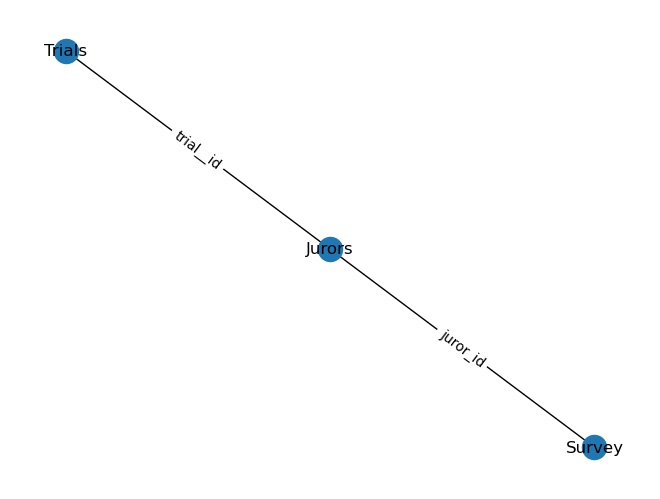

In [174]:
import networkx as nx

# Crear el grafo
G = nx.Graph()

# Agregar nodos (tablas)
G.add_node('Jurors')
G.add_node('Trials')
G.add_node('Survey')

# Agregar conexiones (columnas)
G.add_edge('Jurors', 'Trials', column='trial__id')
G.add_edge('Survey', 'Jurors', column='juror_id')

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Agregar etiquetas a las conexiones (columnas)
labels = {('Jurors', 'Trials'): 'trial__id', ('Survey', 'Jurors'): 'juror_id'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


-id_x ---> id jurado

-id_y ---> id juicio

-id ---> id cuestionario

In [175]:
#Unión tabla juradosxjuicios con encuesta

data = pd.merge(merged_jurors_trials , data_voir_dire_answers, left_on='id_x', right_on='juror_id')
print(data.shape)

data.head(5)

(3353, 95)


,id_x,trial__id,chosen,year,race_White,gender_Male,gender_Unknown,id_y,state_strikes,defense_strikes,...,witness_defense,witness_state,prior_info,death_hesitation,no_death,no_life,no_cops,yes_cops,legally_disqualified,witness_ambi
0,1,1,1,1993,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,1,1993,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,1993,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,1,1993,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,1,0,1993,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
data.columns

Index(['id_x', 'trial__id', 'chosen', 'year', 'race_White', 'gender_Male',
       'gender_Unknown', 'id_y', 'state_strikes', 'defense_strikes',
       'batson_claim_by_defense', 'batson_claim_by_state', 'county_Carroll',
       'county_Choctaw', 'county_Grenada', 'county_Montgomery',
       'county_Webster', 'county_Winston', 'defendant_race_White',
       'judge_Joseph Loper, Jr', 'judge_Other', 'offense_Drug-related',
       'offense_Homicide-related', 'offense_Miscellaneous',
       'offense_Robbery-related', 'offense_Sexual-related', 'same_race', 'id',
       'juror_id', 'no_responses', 'married', 'children', 'religious',
       'education', 'leans_state', 'leans_defense', 'leans_ambi',
       'moral_hardship', 'job_hardship', 'caretaker', 'communication',
       'medical', 'employed', 'social', 'prior_jury', 'crime_victim',
       'fam_crime_victim', 'accused', 'fam_accused', 'eyewitness',
       'fam_eyewitness', 'military', 'law_enforcement', 'fam_law_enforcement',
       'prema

In [177]:
merged_jurors_trials.isnull().sum().sort_values(ascending=False)

same_race                   0
county_Carroll              0
trial__id                   0
chosen                      0
year                        0
race_White                  0
gender_Male                 0
gender_Unknown              0
id_y                        0
state_strikes               0
defense_strikes             0
batson_claim_by_defense     0
batson_claim_by_state       0
county_Choctaw              0
offense_Sexual-related      0
county_Grenada              0
county_Montgomery           0
county_Webster              0
county_Winston              0
defendant_race_White        0
judge_Joseph Loper, Jr      0
judge_Other                 0
offense_Drug-related        0
offense_Homicide-related    0
offense_Miscellaneous       0
offense_Robbery-related     0
id_x                        0
dtype: int64

In [178]:
#Distriución variable target

data.chosen.value_counts(normalize=True)

0    0.636147
1    0.363853
Name: chosen, dtype: float64

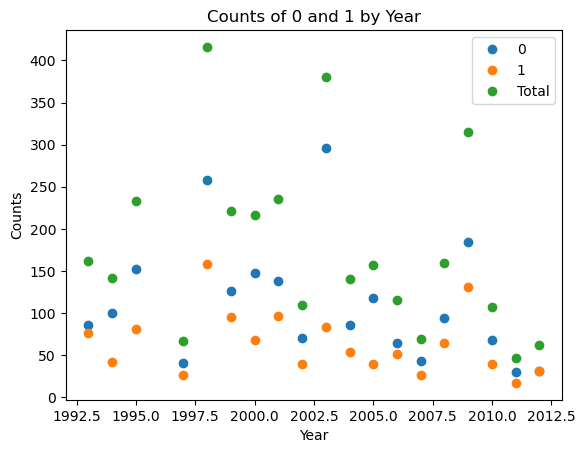

In [179]:
counts = data.groupby('year')['chosen'].value_counts().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)
plt.plot(counts.loc[:, 0], 'o', label='0')
plt.plot(counts.loc[:, 1], 'o', label='1')
plt.plot(counts['total'], 'o', label='Total')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts of 0 and 1 by Year')
plt.legend()
plt.show()

------------------------

MODELOS

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold

In [181]:
#Dividimos la data entre variabla target (y) y las features selecciondas para predecir (X)

X = data.drop(['chosen', 'id_x','year', 'trial__id', 'id_y', 'id', 'juror_id', 'married', 'children', 'religious', 'education'], axis =1)
y = data['chosen']

In [182]:
#Separamos la muestra entre train y test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [183]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

MODELO  GAUSSIAN NB

In [184]:
from sklearn.naive_bayes import GaussianNB

In [185]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size = 0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)

GaussianNB()

In [186]:
y_pred_gnb = gnb.predict(X_test_gnb)
y_pred_gnb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [187]:
#Accuracy en train
accuracy_score(y_train_gnb, gnb.predict(X_train_gnb).round(3))

0.6212185769066894

In [188]:
#paleta colores
cmap = sns.color_palette("Greens_d", as_cmap=True)
vmin, vmax = 0, 500

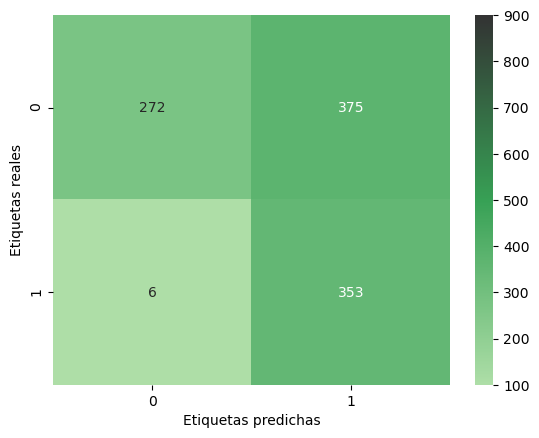

In [226]:
conf_mat = confusion_matrix(y_test_gnb, y_pred_gnb)
sns.heatmap(confusion_matrix(y_test_gnb, y_pred_gnb), annot=True, fmt='.0f',cmap=cmap, vmin=vmin, vmax=vmax)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

MODELO KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.3, random_state=42)

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=kf)
    # cv_scores = cross_val_score(knn, X_train_gnb, y_train_gnb, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio': np.mean(cv_scores),
                      'score_std': np.std(cv_scores),
                      'n_neighbors': i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [192]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores

,score_medio,score_std,n_neighbors
0,0.630582,0.016209,1
1,0.649333,0.014526,2
2,0.635271,0.011709,3
3,0.652742,0.020808,4
4,0.643800,0.020074,5
5,0.642949,0.026193,6
6,0.636148,0.020093,7
7,0.651046,0.014120,8
8,0.642104,0.009699,9
9,0.643794,0.007345,10


In [193]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.630582,0.016209,1,0.614373,0.646791
1,0.649333,0.014526,2,0.634807,0.663859
2,0.635271,0.011709,3,0.623562,0.646980
3,0.652742,0.020808,4,0.631934,0.673550
4,0.643800,0.020074,5,0.623725,0.663874


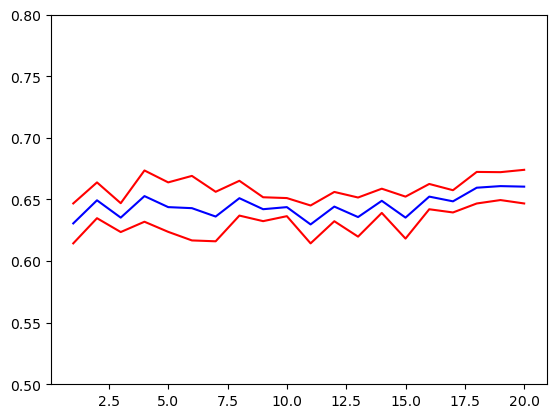

In [194]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color = 'r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color = 'b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color = 'r')
plt.ylim(0.5, 0.8);

In [195]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
18,0.660848,0.011323,19,0.649525,0.672171


In [196]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 'n_neighbors'].values[0]
best_k

19

In [197]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
knn = KNeighborsClassifier(n_neighbors=best_k)

# Generamos los datasets de train y test.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.3, random_state=42)

# Lo ajustamos sobre los datos de entrenamiento
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)

In [198]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_knn, knn.predict(X_train_knn))


0.7013208351086493

In [199]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test_knn, y_pred_knn)

0.6540755467196819

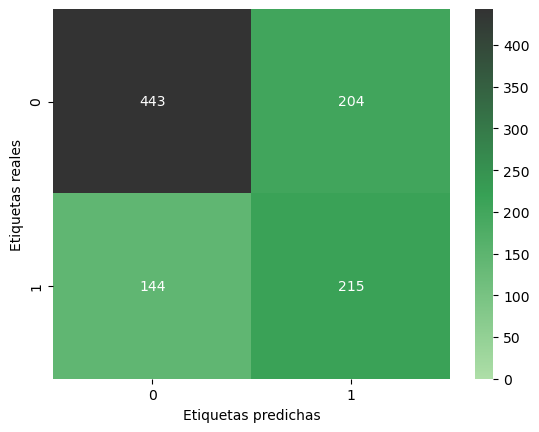

In [200]:
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)
sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn), annot=True, fmt='.0f', cmap=cmap, vmin=vmin)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [201]:
TP = confusion_knn[1, 1]; TN = confusion_knn[0, 0] ; FP = confusion_knn[0, 1] ; FN = confusion_knn[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  215  TN:  443  FP:  204  FN:  144


In [202]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.6846986089644513
Total de casos negativos predichos correctamente (TN) = 443
Total de casos negativos (TN+FP) = 647


In [203]:
print(recall_score(y_test_knn, y_pred_knn).round(2))

0.6


LOGISTIC REGRESSION

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size = 0.3, random_state= 42)
lg = LogisticRegression()
lg.fit(X_train_lg, y_train_lg)
y_pred_lg = lg.predict(X_test_lg)
print("Accuracy / Precisión = ", accuracy_score(y_test_lg, y_pred_lg).round(2))

Accuracy / Precisión =  0.7


In [206]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_lg, lg.predict(X_train_lg)).round(2)

0.72

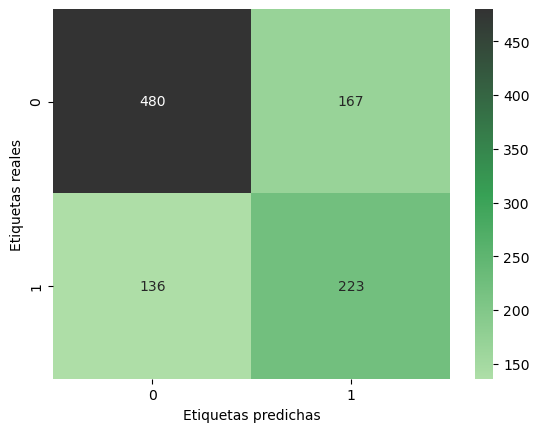

In [207]:
conf_mat_lg = confusion_matrix(y_test_lg, y_pred_lg)
sns.heatmap(confusion_matrix(y_test_lg, y_pred_lg), annot=True, fmt='.0f', cmap = cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

XGBOOST

In [208]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [209]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [210]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [211]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.2s finished


[22:01:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...tone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
       

In [212]:
xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [213]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [214]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

Rendimiento de XG Boost:	0.709 ± 0.01


In [215]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [216]:
from sklearn.metrics import roc_auc_score
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7029467042556048


In [217]:
xgb.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [218]:
accuracy_score(y_test, xgb.predict(X_test))

0.7127236580516899

In [219]:
recall_score(y_test, xgb.predict(X_test))

0.662303664921466

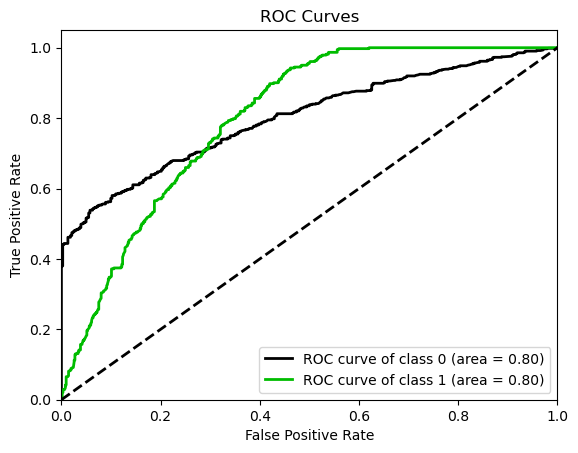

In [220]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

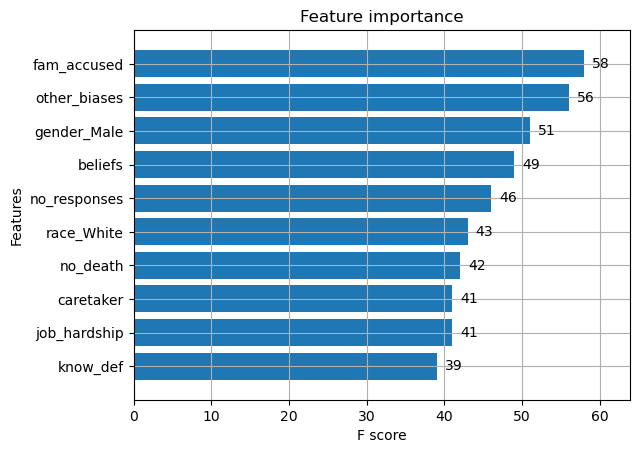

In [221]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=10);

In [222]:
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [223]:
#paleta colores
cmap = sns.color_palette("Greens_d", as_cmap=True)
vmin, vmax = 100,900

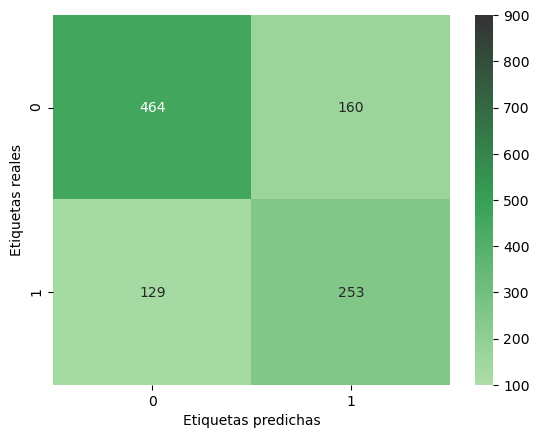

In [224]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f',cmap=cmap, vmin=vmin, vmax=vmax)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');